<a href="https://colab.research.google.com/github/egonik-unlp/random_projects/blob/master/nns/japanese_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_name=datetime.strftime(datetime.now(), '%d-%m_%H-%M')
os.mkdir('/content/drive/MyDrive/cnn_japan/{}'.format(folder_name))

In [3]:
!mkdir /root/.kaggle
!wget https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json -P /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pip install -q kaggle

--2021-06-14 13:47:08--  https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘/root/.kaggle/kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2021-06-14 13:47:09 (3.28 MB/s) - ‘/root/.kaggle/kaggle.json’ saved [68/68]



In [4]:
!kaggle datasets download anokas/kuzushiji

 98% 561M/571M [00:14<00:00, 40.5MB/s]
100% 571M/571M [00:14<00:00, 41.1MB/s]


In [5]:
import json
from IPython.display import Markdown as md
from IPython.display import display as d
!kaggle datasets metadata anokas/kuzushiji
with open("dataset-metadata.json","r") as file:
  metadata=json.load(file)
d(md(metadata["description"]))

Downloaded metadata to /content/dataset-metadata.json


## Background ##

![scroll][1]

Recorded historical documents give us a peek into the past. We are able to glimpse the world before our time; and see its culture, norms, and values to reflect on our own. Japan has very unique historical pathway. Historically, Japan and its culture was relatively isolated from the West, until the Meiji restoration in 1868 where Japanese leaders reformed its education system to modernize its culture. This caused drastic changes in the Japanese language, writing and printing systems. Due to the modernization of Japanese language in this era, cursive Kuzushiji (くずし字) script is no longer taught in the official school curriculum. Even though Kuzushiji had been used for over 1000 years, most Japanese natives today cannot read books written or published over 150 years ago.

The result is that there are hundreds of thousands of Kuzushiji texts that have been digitised but have never been transcribed, and can only currently be read by a few experts. We've built Kuzushiji-MNIST and sister datasets by taking handwritten characters from these texts and preprocessing them in a format similar to the MNIST dataset, to create easy to use benchmark datasets that are more modern and difficult to classify than the original MNIST dataset.

By releasing these datasets, we're also hoping to bring together the fields of Japanese literature and ML 😊

📚 [Read the paper](https://arxiv.org/abs/1812.01718) to learn more about Kuzushiji, the datasets and our motivations for making them!

## The datasets ##

 1. **Kuzushiji-MNIST** is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.

 - `kmnist-[train/test]-[images/labels].npz`: These files contain the
   Kuzushiji-MNIST as compressed numpy arrays, and can be read with:
   `arr = np.load(filename)['arr_0']`. We recommend using these files to
   load the dataset. 
 - `[train/t10k]-[images/labels]-idx[1/3]-ubyte.gz`:
   These files contain `Kuzushiji-MNIST` with the same file format and
   filenames as the original MNIST for drop-in compatibility.
 - `kmnist-classmap.csv`: A mapping from class IDs to unicode characters
   for Kuzushiji-MNIST

Some examples of Kuzushiji-MNIST with the first column being the modern Hiragana counterpart:
![Kuzushiji-MNIST examples][2]

2. **Kuzushiji-49**, as the name suggests, has 49 classes (28x28 grayscale, 270,912 images), is a much larger, but imbalanced dataset containing 48 Hiragana characters and one Hiragana iteration mark.

 - `k49-[train/test]-[images/labels].npz`: These files contain the Kuzushiji-49 as compressed numpy arrays    
 - `k49-classmap.csv`: A mapping from class IDs to unicode characters for Kuzushiji-49

3. **Kuzushiji-Kanji** is an imbalanced dataset of total 3832 Kanji characters (64x64 grayscale, 140,426 images), ranging from 1,766 examples to only a single example per class. *We're also planning to release a train-test split for this dataset soon.*

 - `kkanji2/`: This folder contains subfolders of images, with each subfolder corresponding to one Kanji character class.

![Kuzushiji-Kanji examples][3]

## License ##
The dataset is licensed under a permissive CC BY-SA 4.0 license, which requires attribution, and we would suggest to use the following attribution to the KMNIST dataset:

"KMNIST Dataset" (created by CODH), adapted from "Kuzushiji Dataset" (created by NIJL and others), doi:10.20676/00000341

  [1]: https://i.imgur.com/dhBM3BG.jpg
  [2]: https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kmnist_examples.png
  [3]: https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kkanji_examples.png

In [6]:
%%capture
!unzip kuzushiji.zip -d dataset

In [7]:
X_train_val = np.load("dataset/k49-train-imgs.npz")["arr_0"]/255
X_test = np.load("dataset/k49-test-imgs.npz")["arr_0"]/255
t_train_val = np.load("dataset/k49-train-labels.npz")["arr_0"]
t_test = np.load("dataset/k49-test-labels.npz")["arr_0"]

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, t_train, t_val = train_test_split(X_train_val, t_train_val, random_state=42)


In [10]:
t_train_ohe = to_categorical(t_train)
t_val_ohe = to_categorical(t_val)
t_test_ohe = to_categorical(t_test)

In [11]:
X_train_bis=X_train.reshape(-1,28,28,1)
X_val_bis=X_val.reshape(-1,28,28,1)
X_test_bis=X_test.reshape(-1,28,28,1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0     

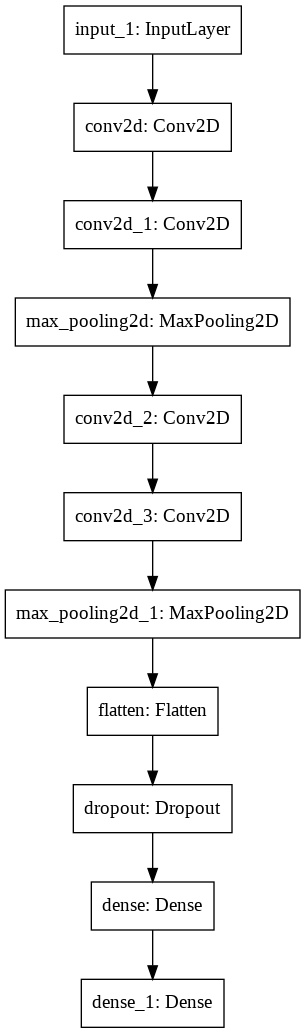

In [37]:
keras.backend.clear_session()


input_=keras.layers.Input(shape=(X_train_bis.shape[1:]))
conv1=keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",padding="same")(input_)
conv2=keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",padding="same")(conv1)
pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
conv3=keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation="tanh",padding="same")(pool1)
conv4=keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation="tanh",padding="same")(conv3)
pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv4)


flatten1=keras.layers.Flatten()(pool2)
dropout1=keras.layers.Dropout(.20)(flatten1)
dense1=keras.layers.Dense(64, activation='relu')(dropout1)
output=keras.layers.Dense(49, activation='softmax')(dense1)
model= keras.models.Model(inputs=[input_], outputs=[output])
model.summary()
keras.utils.plot_model(model)

In [38]:
earlystoppingcb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint=keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_japan/{}/checkpoint.h5'.format(folder_name),save_best_only=True)

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_bis, t_train_ohe, epochs=1300, batch_size=4000, callbacks=[earlystoppingcb, checkpoint], validation_data=(X_val_bis, t_val_ohe))

Epoch 1/1300
44/44 [==============================] - 20s 447ms/step - loss: 3.8901 - accuracy: 0.0215 - val_loss: 3.8817 - val_accuracy: 0.0294
Epoch 2/1300
44/44 [==============================] - 19s 435ms/step - loss: 3.8748 - accuracy: 0.0330 - val_loss: 3.8655 - val_accuracy: 0.0463
Epoch 3/1300
44/44 [==============================] - 19s 436ms/step - loss: 3.8573 - accuracy: 0.0448 - val_loss: 3.8445 - val_accuracy: 0.0637
Epoch 4/1300
44/44 [==============================] - 19s 436ms/step - loss: 3.8310 - accuracy: 0.0579 - val_loss: 3.8087 - val_accuracy: 0.0812
Epoch 5/1300
44/44 [==============================] - 19s 439ms/step - loss: 3.7834 - accuracy: 0.0715 - val_loss: 3.7364 - val_accuracy: 0.0934
Epoch 6/1300
44/44 [==============================] - 19s 438ms/step - loss: 3.6911 - accuracy: 0.0888 - val_loss: 3.6040 - val_accuracy: 0.1196
Epoch 7/1300
44/44 [==============================] - 19s 437ms/step - loss: 3.5414 - accuracy: 0.1242 - val_loss: 3.4141 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/cnn_japan/{}/final_model_over_100.h5'.format(folder_name))

In [ ]:
model=keras.models.load_model("/content/drive/MyDrive/cnn_japan/{}/final_model_over_100.h5".format(folder_name))

In [ ]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
# history.history.keys()

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

### Luego de Entrenar cargo el modelo

In [ ]:
from datetime import datetime

In [ ]:
!git clone https://github.com/egonik-unlp/random_projects.git

In [ ]:
%%capture

!pip install japanize-matplotlib
!sudo apt-get install fonts-takao-mincho fonts-takao-gothic fonts-takao-pgothic
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='TakaoPGothic')
import japanize_matplotlib
plt.rcParams.update({"font.size":21})
import cv2

In [ ]:
# model= keras.models.load_model('/content/drive/MyDrive/cnn_japan/final_model.h5')

In [ ]:
model.evaluate(X_test_bis,t_test_ohe)

In [ ]:
%cd /content/random_projects/prueba_cnn/
reshaped_binarised_images=(np.array([cv2.imread(file,-1) for file in os.listdir() if file[-4:]== '.jpg'])/255).reshape(-1,28,28,1)

In [ ]:
preds=model.predict(np.array(reshaped_binarised_images))

In [ ]:
refs=pd.read_csv('/content/dataset/k49_classmap.csv')

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(30,30))
ax=ax.flatten()
for n,image in enumerate(reshaped_binarised_images):
  ax[n].imshow(image[:,:,0])
  # softmax=model.predict(image)
  pred,proba = np.argmax(preds[n]), preds[n].max()
  ax[n].set_title('Prediccion CNN: {}\n probabilidad= {}'.format(refs.loc[pred,'char'],proba))

plt.savefig('/content/drive/MyDrive/cnn_japan/{}/plot.png'.format(folder_name))

In [ ]:
pd.DataFrame(history.history).to_csv('/content/drive/MyDrive/cnn_japan/{}/history.csv'.format(folder_name))

In [ ]:
history.history

In [ ]:
for i in range(20):
  print(i)